In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_excel("/content/Blogs.xlsx")
df.head()

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 2. Drop empty columns (like Unnamed: 2 onward)
df = df[['Data', 'Labels']]

# Ensure 'Data' column is of string type
df['Data'] = df['Data'].astype(str)

/tmp/ipython-input-4-1820981543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = df['Data'].astype(str)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93822 entries, 0 to 93821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    93822 non-null  object
 1   Labels  20517 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

,0
Data,0
Labels,73305


In [7]:
df.describe()

,Data,Labels
count,93822,20517
unique,64521,17369
top,nan,
freq,14591,165


In [8]:
df.duplicated().sum()

np.int64(27128)

In [9]:
# 3. Drop rows with missing values
df.dropna(subset=['Data', 'Labels'], inplace=True)

In [11]:

# 4. Features (text) and labels
X = df['Data']
y = df['Labels']

In [12]:
# 5. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [13]:
# 6. Convert text to numerical data (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
y_train = y_train.astype(str)
y_test = y_test.astype(str)


In [15]:
# Now train the model
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [16]:
# 8. Predict on test data
y_pred = clf.predict(X_test_tfidf)

In [17]:
# 9. Evaluate the model
confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

'                                                                                        precision    recall  f1-score   support\n\n                                                        \t               | Raffles Hall       0.00      0.00      0.00         1\n                                                                        \tXmATTACH_FORM       0.00      0.00      0.00         1\n                                                                                             0.01      0.90      0.02        29\n                                                                                             0.00      0.00      0.00         1\n                                                                                             0.00      0.00      0.00         1\n                                                                                    |        0.00      0.00      0.00         1\n                                                               |   or fast. Any two.""      

In [18]:
!pip install vaderSentiment

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [20]:
def get_sentiment(text):
    if not isinstance(text, str):
        return 'neutral'  # Or np.nan if you want to ignore these rows
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [21]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [22]:
print(get_sentiment("This is a positive sentence"))   #result

positive


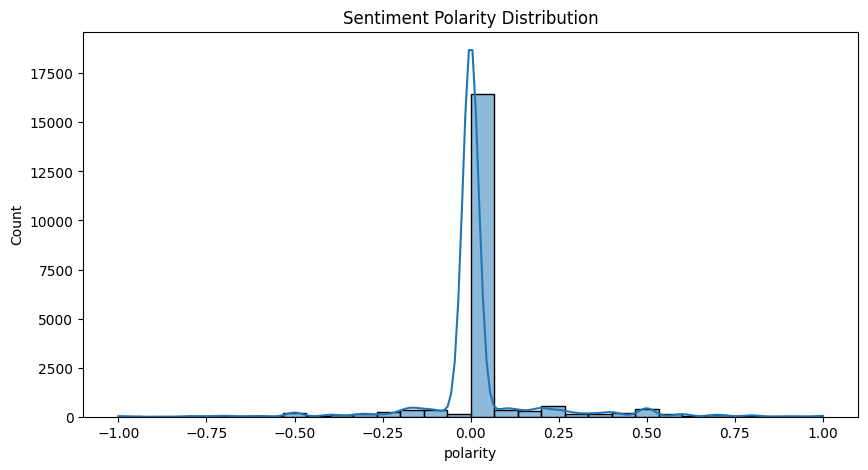

In [23]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

df['polarity'] = df['Data'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Data'].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)

plt.figure(figsize=(10, 5))
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()

In [24]:
df = df.iloc[:, :2]
df.columns = ['Text', 'Label']

# Now perform sentiment analysis after dropping unnecessary columns and renaming
from textblob import TextBlob
df['SentimentScore'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [25]:
df.dropna(subset=['Text', 'Label'], inplace=True)
df['Text'] = df['Text'].str.replace('\n', ' ').str.strip()

In [26]:
# Categorize sentiment
def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [27]:
df['SentimentLabel'] = df['SentimentScore'].apply(label_sentiment)

In [28]:
# Filter out rows where 'Label' is not a string
df_filtered = df[df['Label'].apply(lambda x: isinstance(x, str))]

# Count sentiments across categories
sentiment_counts = df_filtered.groupby(['Label', 'SentimentLabel']).size().unstack().fillna(0)
print(sentiment_counts)

SentimentLabel                   negative  neutral  positive
Label                                                       
\t\t\t\t\t\t\t      *                 0.0      1.0       0.0
\t\t8                                 0.0      1.0       0.0
\t               | Raffles Hall       0.0      1.0       0.0
\tXmATTACH_FORM                       0.0      2.0       0.0
                                     19.0    103.0      43.0
...                                   ...      ...       ...
y positions are known.                0.0      0.0       1.0
y) (other points                      0.0      1.0       0.0
y) (the known true values)            0.0      1.0       0.0
y) (the same points                   0.0      1.0       0.0
|| UUNET:uunet!bcr!fist               0.0      3.0       0.0

[17293 rows x 3 columns]


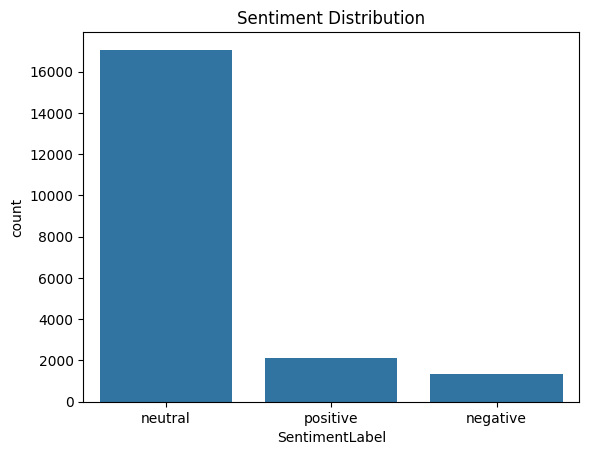

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='SentimentLabel')
plt.title("Sentiment Distribution")
plt.show()